In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

#from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# data_2016 = pd.read_csv('./Beijing_2016_HourlyPM25_created20170103.csv')
# data_2015 = pd.read_csv('./Beijing_2015_HourlyPM25_created20160201.csv')
# data_2014 = pd.read_csv('./Beijing_2014_HourlyPM25_created20150203.csv')
# data_2013 = pd.read_csv('./Beijing_2013_HourlyPM2.5_created20140325.csv')
# data_2012 = pd.read_csv('./Beijing_2012_HourlyPM2.5_created20140325.csv')
# data_2011 = pd.read_csv('./Beijing_2011_HourlyPM25_created20140709.csv')
# data_2010 = pd.read_csv('./Beijing_2010_HourlyPM25_created20140709.csv')
# data_2009 = pd.read_csv('./Beijing_2009_HourlyPM25_created20140709.csv')
# data_2008 = pd.read_csv('./Beijing_2008_HourlyPM2.5_created20140325.csv')


In [70]:
# Concatenate all data sets
data_sets = [data_2008 , data_2009, data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016]
pm25 = pd.concat(data_sets)

In [71]:
pm25.shape

(74471, 11)

In [72]:
pm25.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid
2,Beijing,PM2.5,4/8/08 17:00,2008,4,8,17,152,�g/mg_,1 Hr,Valid
3,Beijing,PM2.5,4/8/08 18:00,2008,4,8,18,162,�g/mg_,1 Hr,Valid
4,Beijing,PM2.5,4/8/08 19:00,2008,4,8,19,171,�g/mg_,1 Hr,Valid


In [73]:
for n in range(1, 13):
    print 'Month ', n
    print pm25[pm25.Month == n].shape

Month  1
(5952, 11)
Month  2
(5424, 11)
Month  3
(5952, 11)
Month  4
(6297, 11)
Month  5
(6696, 11)
Month  6
(6480, 11)
Month  7
(6696, 11)
Month  8
(6696, 11)
Month  9
(6480, 11)
Month  10
(6696, 11)
Month  11
(5894, 11)
Month  12
(5208, 11)


 ## Check whether data is complete
 
 ## Data range : 2008/4/8 15:00 - 2016/11/30 23:00

 Apr - Nov : 9 years
     
     31*24*9 = 6696 
     May  
     July
     Aug
     Oct 
     
     30*24*9 = 6480
     June
     Sept
     Nov (only 134 rather than 720 records for 2008. investigate)
     
     Apr = 30*24*8 + 22*24 + 9 = 6297
    
 Dec - Mar : 8 years
    
    31*24*8 = 5952
    Dec = 31*24*7  = 5208(missing 2008 and 2016 data)
    Jan
    Mar
    
    Feb = 28*24*8 + 2*24 = 5424


In [74]:
test = pm25[(pm25.Month == 11) | (pm25.Month == 12)]

In [75]:
test.Year.value_counts()

2015    1464
2014    1464
2013    1464
2012    1464
2011    1464
2010    1464
2009    1464
2016     720
2008     134
Name: Year, dtype: int64

In [76]:
nov = pm25[(pm25.Month == 11)]
dec = pm25[(pm25.Month == 12)]

## Only 134 Nov data points for 2008 - Full days Nov 1-5, Nov 6 0:00 - 13:00

In [77]:
nov.Year.value_counts()

2015    720
2011    720
2014    720
2010    720
2013    720
2009    720
2016    720
2012    720
2008    134
Name: Year, dtype: int64

In [78]:
nov[nov.Year == 2008]['Day'].value_counts()

5    24
4    24
3    24
2    24
1    24
6    14
Name: Day, dtype: int64

In [79]:
nov[(nov.Year == 2008)&(nov.Day == 6)]['Hour']

5073     0
5074     1
5075     2
5076     3
5077     4
5078     5
5079     6
5080     7
5081     8
5082     9
5083    10
5084    11
5085    12
5086    13
Name: Hour, dtype: int64

## No December data for 2008 and 2016

In [80]:
dec.Year.value_counts()

2015    744
2011    744
2014    744
2010    744
2013    744
2009    744
2012    744
Name: Year, dtype: int64

## Now investigate invalid data

In [81]:
pm25.Value.describe().T

count    74471.000000
mean        27.388970
std        271.601833
min       -999.000000
25%         22.000000
50%         62.000000
75%        122.000000
max        994.000000
Name: Value, dtype: float64

In [82]:
pm25.groupby('Value').count().reset_index().iloc[:,0:2]

,Value,Site
0,-999,4429
1,-15,5
2,-4,1
3,-3,1
4,-2,6
5,-1,11
6,0,15
7,1,28
8,2,68
9,3,121


In [83]:
invalid_values = pm25[pm25.Value <0]
invalid_values.head(2)

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
694,Beijing,PM2.5,5/7/08 13:00,2008,5,7,13,-999,�g/mg_,1 Hr,Missing
695,Beijing,PM2.5,5/7/08 14:00,2008,5,7,14,-999,�g/mg_,1 Hr,Missing


In [84]:
invalid_values.shape

(4453, 11)

In [85]:
# Make 'Date' column that excludes hours of the day
invalid_values['Date'] = invalid_values['Date (LST)'].apply(lambda x: x[0:-5].strip())
invalid_values.head(30)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
694,Beijing,PM2.5,5/7/08 13:00,2008,5,7,13,-999,�g/mg_,1 Hr,Missing,5/7/08
695,Beijing,PM2.5,5/7/08 14:00,2008,5,7,14,-999,�g/mg_,1 Hr,Missing,5/7/08
863,Beijing,PM2.5,5/14/08 14:00,2008,5,14,14,-999,�g/mg_,1 Hr,Missing,5/14/08
864,Beijing,PM2.5,5/14/08 15:00,2008,5,14,15,-999,�g/mg_,1 Hr,Missing,5/14/08
1027,Beijing,PM2.5,5/21/08 10:00,2008,5,21,10,-999,�g/mg_,1 Hr,Missing,5/21/08
1028,Beijing,PM2.5,5/21/08 11:00,2008,5,21,11,-999,�g/mg_,1 Hr,Missing,5/21/08
2179,Beijing,PM2.5,7/8/08 10:00,2008,7,8,10,-999,�g/mg_,1 Hr,Missing,7/8/08
2180,Beijing,PM2.5,7/8/08 11:00,2008,7,8,11,-999,�g/mg_,1 Hr,Missing,7/8/08
2203,Beijing,PM2.5,7/9/08 10:00,2008,7,9,10,-999,�g/mg_,1 Hr,Missing,7/9/08
2204,Beijing,PM2.5,7/9/08 11:00,2008,7,9,11,-999,�g/mg_,1 Hr,Missing,7/9/08


In [86]:
# 11/6/2008 only had 14 data points
incomplete_day = pd.DataFrame([['11/6/08', 10], ['4/8/08', 15]], columns=['Date', 'Site'])
incomplete_day

,Date,Site
0,11/6/08,10
1,4/8/08,15


In [87]:
invalid_dates = invalid_values.groupby('Date').count().reset_index().iloc[:,0:2]
invalid_dates = invalid_dates.append(incomplete_day, ignore_index=True)
invalid_dates = invalid_dates.rename(columns={'Site':'Missing_value_counts'})
invalid_dates.head()

,Date,Missing_value_counts
0,1/1/09,24
1,1/1/10,23
2,1/1/11,23
3,1/10/09,24
4,1/10/11,15


In [88]:
invalid_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 2 columns):
Date                    458 non-null object
Missing_value_counts    458 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [89]:
# Added 4/8/09 and 11/6/08 as two incomplete days in additional to the invalid days with negative values
invalid_dates.shape

(458, 2)

## Investigate patterns of missing days

In [90]:
missing_data_freq = []
for n in range(25):
    missing_data_freq.append(len(invalid_dates[invalid_dates['Missing_value_counts'] == n]))
print missing_data_freq
print 'check sum:', sum(missing_data_freq)

[0, 132, 48, 14, 14, 16, 10, 11, 13, 15, 6, 14, 9, 3, 6, 16, 6, 1, 5, 2, 6, 1, 2, 7, 101]
check sum: 458


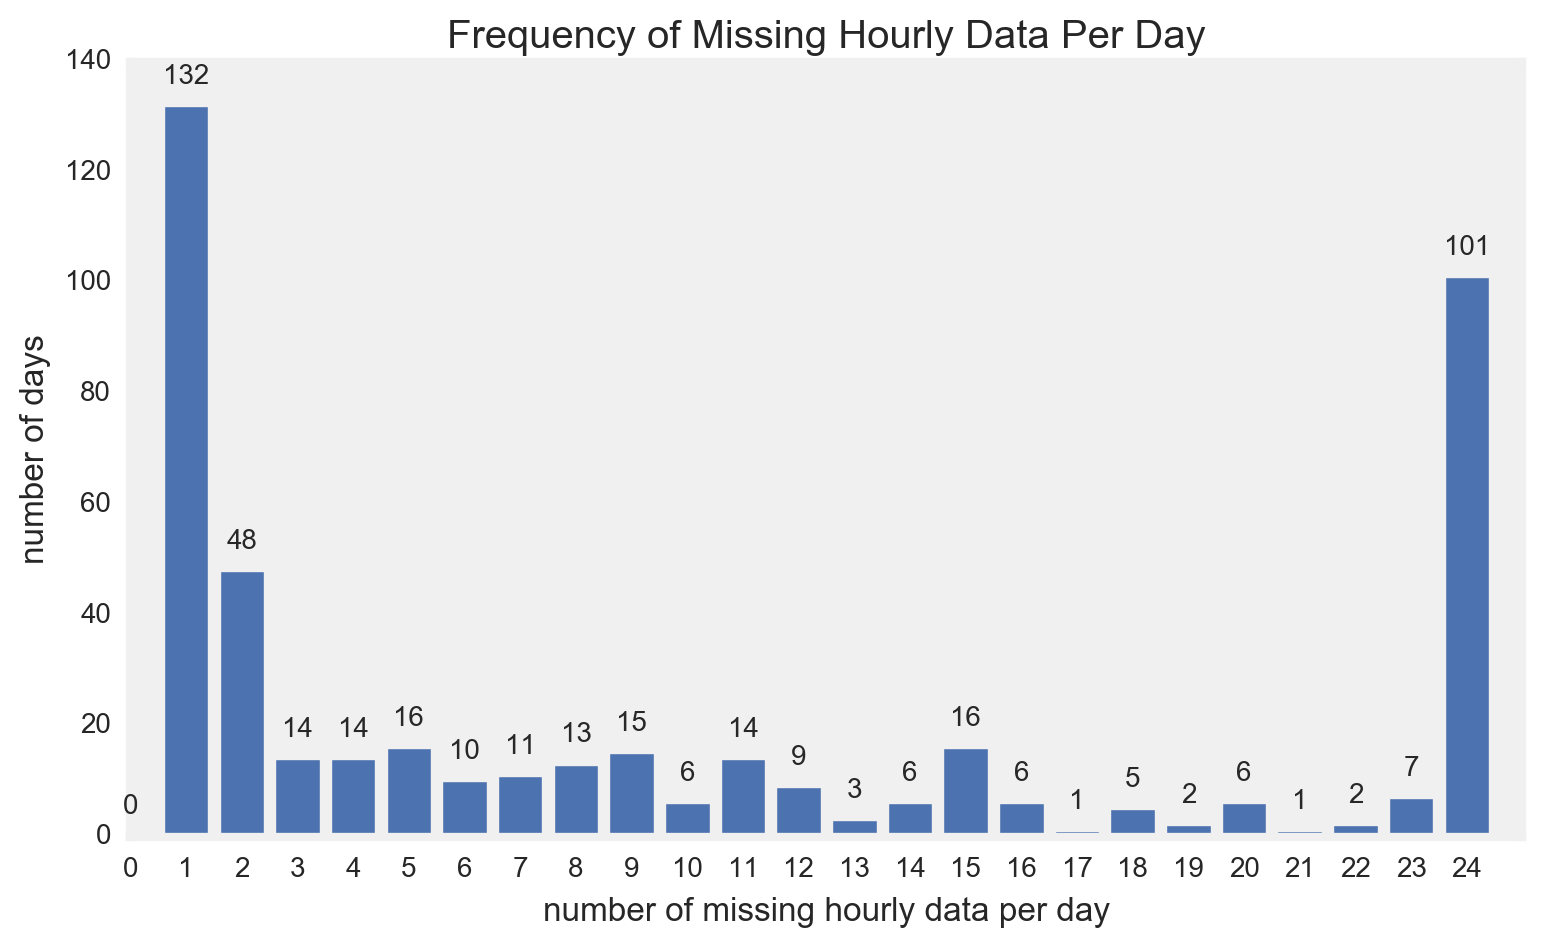

In [91]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(range(25), missing_data_freq, align='center')
ax.set(xticks=range(25), xlim=[0, 25])

ax.set_title("Frequency of Missing Hourly Data Per Day")
ax.set_xlabel("number of missing hourly data per day")
ax.set_ylabel("number of days")
ax.grid('off')

# Now make some labels
rects = ax.patches

for rect, label in zip(rects, missing_data_freq):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 3, label, ha='center', va='bottom')

# plt.savefig("image.png")
plt.show()

In [92]:
missing_data=[24, 18, 12, 6]
years = ['08', '09', '10', '11', '12', '13', '14', '15', '16']
for n in  missing_data:
    print '\n\n\n\nFor', n, 'or more missing data per day'
    dates_to_drop = invalid_dates[invalid_dates['Missing_value_counts']>= n].Date.tolist()
    print 'Total days to drop is', len(dates_to_drop)
    
    
    for j in years:
        print '-------------------------------------------------------------------------------------------------------'
        print "Year '",j
        drop = []
        for i in dates_to_drop:
            if i[-2:] == j:
                drop.append(i)
        print drop





For 24 or more missing data per day
Total days to drop is 101
-------------------------------------------------------------------------------------------------------
Year ' 08
['7/10/08']
-------------------------------------------------------------------------------------------------------
Year ' 09
['1/1/09', '1/10/09', '1/11/09', '1/12/09', '1/13/09', '1/14/09', '1/15/09', '1/16/09', '1/17/09', '1/18/09', '1/19/09', '1/2/09', '1/20/09', '1/21/09', '1/22/09', '1/23/09', '1/24/09', '1/25/09', '1/26/09', '1/27/09', '1/28/09', '1/29/09', '1/3/09', '1/30/09', '1/31/09', '1/4/09', '1/5/09', '1/6/09', '1/7/09', '1/8/09', '1/9/09', '11/16/09', '11/17/09', '12/25/09', '12/26/09', '12/27/09', '2/1/09', '2/10/09', '2/11/09', '2/12/09', '2/13/09', '2/14/09', '2/15/09', '2/16/09', '2/2/09', '2/27/09', '2/28/09', '2/3/09', '2/4/09', '2/5/09', '2/6/09', '2/7/09', '2/8/09', '2/9/09', '3/1/09', '3/2/09', '5/14/09', '5/15/09', '5/16/09', '5/17/09', '5/4/09', '5/5/09', '5/6/09', '6/5/09']
--------

## There are many consecutive days with more than a quarter of the data missing in a day. I will drop all of them.
## Then impute missing data with KNN only if there are less than 6 data points missing.

### Days to drop:


In [93]:
# number of rows to drop
print 'Total rows with negative values:', (np.array(range(25)) * np.array(missing_data_freq)).sum()
print 'Rows with 6 or less missing values a day:', (np.array(range(25)[0:7]) * np.array(missing_data_freq[0:7])).sum()
print 'Rows to drop with more than 6 missing values a day:', (np.array(range(25)) * np.array(missing_data_freq)).sum() \
- (np.array(range(25)[0:7]) * np.array(missing_data_freq[0:7])).sum()

Total rows with negative values: 4478
Rows with 6 or less missing values a day: 466
Rows to drop with more than 6 missing values a day: 4012


In [94]:
# add date column onto pm25
pm25['Date'] = pm25['Date (LST)'].apply(lambda x: x[0:-5].strip())

In [95]:
pm25.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid,4/8/08
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid,4/8/08
2,Beijing,PM2.5,4/8/08 17:00,2008,4,8,17,152,�g/mg_,1 Hr,Valid,4/8/08
3,Beijing,PM2.5,4/8/08 18:00,2008,4,8,18,162,�g/mg_,1 Hr,Valid,4/8/08
4,Beijing,PM2.5,4/8/08 19:00,2008,4,8,19,171,�g/mg_,1 Hr,Valid,4/8/08


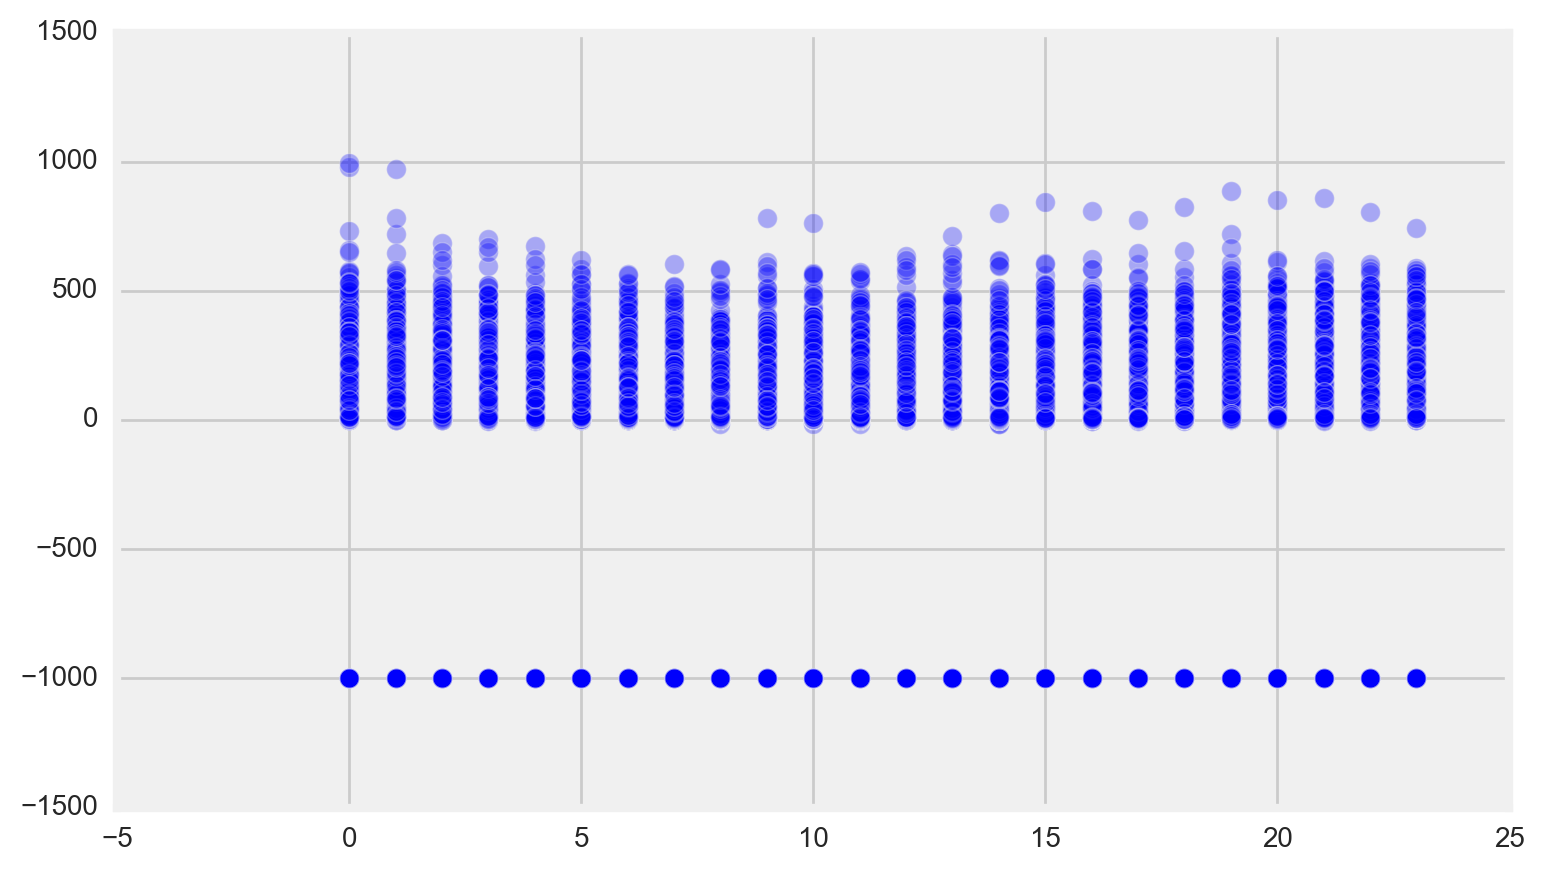

In [96]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pm25.Hour, pm25.Value, alpha=0.3, s=50)
plt.show()

In [97]:
dates_to_drop = invalid_dates[invalid_dates['Missing_value_counts']> 6].Date.tolist()

In [98]:
def drop_funct(x):
    if x in dates_to_drop:
        return False
    else:
        return True

In [99]:
pm25_drop_6moremissing = pm25[pm25['Date'].map(drop_funct)]

In [100]:
pm25.shape[0] - pm25_drop_6moremissing.shape[0]

5351

In [101]:
(len(dates_to_drop)-2)*24+9+14 # 9 datapoints on 4/8/08, 14 data points on 11/6/08

5351

In [102]:
'4/8/08' in dates_to_drop

True

In [103]:
pm25.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid,4/8/08
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid,4/8/08
2,Beijing,PM2.5,4/8/08 17:00,2008,4,8,17,152,�g/mg_,1 Hr,Valid,4/8/08
3,Beijing,PM2.5,4/8/08 18:00,2008,4,8,18,162,�g/mg_,1 Hr,Valid,4/8/08
4,Beijing,PM2.5,4/8/08 19:00,2008,4,8,19,171,�g/mg_,1 Hr,Valid,4/8/08


### Days to impute:

In [104]:
dates_to_impute = invalid_dates[(invalid_dates['Missing_value_counts']<= 6)].Date.tolist()

In [105]:
def impute_funct(x):
    if x in dates_to_impute:
        return True
    else:
        return False

### pm25_impute has all the days with missing data between 1 and 6, inclusive

In [222]:
pm25_impute = pm25[pm25.Date.map(impute_funct)]

In [223]:
pm25_impute.shape

(5616, 12)

In [224]:
len(dates_to_impute)*24

5616

In [225]:
pm25_impute.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
681,Beijing,PM2.5,5/7/08 0:00,2008,5,7,0,65,�g/mg_,1 Hr,Valid,5/7/08
682,Beijing,PM2.5,5/7/08 1:00,2008,5,7,1,61,�g/mg_,1 Hr,Valid,5/7/08
683,Beijing,PM2.5,5/7/08 2:00,2008,5,7,2,66,�g/mg_,1 Hr,Valid,5/7/08
684,Beijing,PM2.5,5/7/08 3:00,2008,5,7,3,67,�g/mg_,1 Hr,Valid,5/7/08
685,Beijing,PM2.5,5/7/08 4:00,2008,5,7,4,64,�g/mg_,1 Hr,Valid,5/7/08


### pm25_full_day has all the full day data points after dropping the days that have too many missing data

In [110]:
def full_funct(x):
    if x not in dates_to_impute:
        return True
    else:
        return False

In [111]:
pm25_full_day = pm25_drop_6moremissing[pm25_drop_6moremissing.Date.map(full_funct)]

In [112]:
(pm25_drop_6moremissing.shape[0] - pm25_full_day.shape[0]) == pm25_impute.shape[0]

True

In [301]:
# Check whether the df dimension is right

len(pm25.Date.unique()) - pm25_full_day_wide.shape[0]

458

In [115]:
len(pm25_impute.Date.unique()) + len(dates_to_drop)

458

In [226]:
pm25_full_day_wide = pd.pivot_table(pm25_full_day, index='Date', values='Value', columns=['Hour']).reset_index()
pm25_full_day_wide.head()

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1/1/12,303,215,222,85,38,23,19,14,16,...,29,39,42,55,55,72,81,80,128,114
1,1/1/13,31,32,21,16,15,9,9,7,14,...,15,13,16,15,20,17,16,19,13,19
2,1/1/14,53,65,70,79,92,106,75,58,33,...,24,26,26,27,43,62,70,81,111,144
3,1/1/15,22,9,9,13,10,6,8,17,11,...,44,48,51,82,87,106,123,136,139,154
4,1/1/16,231,239,205,167,132,169,162,123,100,...,176,187,207,235,268,302,330,345,375,400


In [306]:
pm25_impute_wide = pd.pivot_table(pm25_impute, index='Date', values='Value', columns=['Hour']).reset_index()
pm25_impute_wide.head()

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1/12/13,391,442,425,442,287,275,174,278,-999,...,802,845,810,776,824,886,852,858,805,744
1,1/12/14,-999,-999,-999,-999,-999,12,12,17,33,...,12,8,19,40,37,42,56,62,57,57
2,1/13/13,731,722,684,651,673,584,475,341,288,...,323,326,325,334,343,333,311,304,301,309
3,1/15/13,66,58,61,61,71,79,74,71,80,...,-999,132,134,155,166,183,181,201,227,177
4,1/15/15,302,306,308,316,321,261,237,211,218,...,441,466,475,475,433,423,447,461,470,483


In [307]:
hour_cols = pm25_impute_wide.columns[1:]
imputed_df = pm25_impute_wide.copy()

for row in range(pm25_impute_wide.shape[0]):
    if (row % 100) == 0:
        print row
    missing = np.where(pm25_impute_wide.iloc[row, 1:] < 0)[0]+1 # Col index position for missing values of each row
    pred_cols = np.array([i for i in range(1,25) if not i in missing])
    
    # row:row+1 keeps Ximp as a 2D matrix, rather than 1D if i had just put "row"
    Ximp = pm25_impute_wide.iloc[row:row+1, pred_cols]
    
    for col in missing:
        knn = KNeighborsRegressor(n_neighbors=5)
        y = pm25_full_day_wide.iloc[:, col]
        X = pm25_full_day_wide.iloc[:, pred_cols]
        knn.fit(X, y)
        
        yhat = knn.predict(Ximp)
        imputed_df.iloc[row, col] = yhat

0
100
200


## Alternatively, use decorator to increase efficiency as below:
## (Or use itertools to calculate all combinations or columns missing then do a batch calculation)
### Documentation
```
import functools
def memoize(obj):
    cache = obj.cache = {}
    @functools.wraps(obj)
    def memoizer(*args, **kwargs):
        key = str(args) + str(kwargs)
        if key not in cache:
            cache[key] = obj(*args, **kwargs)
        return cache[key]
    return memoizer```
    
### Apply to our example    
``` 
@memoize
def knn_fitter(valid_cols, missing_col):
    knn = KNeighborsRegressor(n_neighbors=5)
    y = pm25_full_day_wide.iloc[:, missing_col]
    X = pm25_full_day_wide.iloc[:, valid_cols]
    knn.fit(X, y)
    return knn
    ```
   
   
### Use the decorator
```
hour_cols = pm25_impute_wide.columns[1:]
imputed_df = pm25_impute_wide.copy()

for row in range(pm25_impute_wide.shape[0]):
    if (row % 10) == 0:
        print row
    missing = np.where(pm25_impute_wide.iloc[row, 1:25] < 0)[0]+1
    pred_cols = np.array([i for i in range(1,25) if not i in missing])
    
    Ximp = pm25_impute_wide.iloc[row:row+1, pred_cols]
    
    for col in missing:
        knn = knn_fitter(pred_cols, col)
        
        yhat = knn.predict(Ximp)
        imputed_df.iloc[row, col] = yhat
        
```

In [345]:
pm25_impute_wide.head()

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1/12/13,391,442,425,442,287,275,174,278,-999,...,802,845,810,776,824,886,852,858,805,744
1,1/12/14,-999,-999,-999,-999,-999,12,12,17,33,...,12,8,19,40,37,42,56,62,57,57
2,1/13/13,731,722,684,651,673,584,475,341,288,...,323,326,325,334,343,333,311,304,301,309
3,1/15/13,66,58,61,61,71,79,74,71,80,...,-999,132,134,155,166,183,181,201,227,177
4,1/15/15,302,306,308,316,321,261,237,211,218,...,441,466,475,475,433,423,447,461,470,483


In [323]:
imputed_df.head()

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1/12/13,391.0,442.0,425.0,442.0,287.0,275.0,174.0,278.0,334.8,...,802.0,845.0,810.0,776.0,824.0,886.0,852.0,858.0,805.0,744.0
1,1/12/14,43.4,17.2,15.6,16.6,15.2,12.0,12.0,17.0,33.0,...,12.0,8.0,19.0,40.0,37.0,42.0,56.0,62.0,57.0,57.0
2,1/13/13,731.0,722.0,684.0,651.0,673.0,584.0,475.0,341.0,288.0,...,323.0,326.0,325.0,334.0,343.0,333.0,311.0,304.0,301.0,309.0
3,1/15/13,66.0,58.0,61.0,61.0,71.0,79.0,74.0,71.0,80.0,...,122.2,132.0,134.0,155.0,166.0,183.0,181.0,201.0,227.0,177.0
4,1/15/15,302.0,306.0,308.0,316.0,321.0,261.0,237.0,211.0,218.0,...,441.0,466.0,475.0,475.0,433.0,423.0,447.0,461.0,470.0,483.0


In [348]:
# convert pm25 full day data frame into float from int
pm25_full_day_wide_float = pd.concat([pm25_full_day_wide.iloc[:, 0], pm25_full_day_wide.iloc[:,1:].astype(float)], axis=1)

In [349]:
pm25_full_imputed_wide = pd.concat([pm25_full_day_wide_float, imputed_df], axis=0)

In [352]:
print pm25_full_imputed_wide.shape
print pm25_full_imputed_wide.shape[0] == pm25_full_day_wide.shape[0]+imputed_df.shape[0]

(2880, 25)
True


In [353]:
2880 * 24

69120

In [356]:
pm25_drop_6moremissing.shape

(69120, 12)

### Converting 2880 total days including full days of original and imputed data (234 days) into long data format

In [419]:
pm25_full_imputed_long = pd.melt(pm25_full_imputed_wide, id_vars = ['Date'])

In [420]:
pm25_full_imputed_long.head()

,Date,Hour,value
0,1/1/12,0,303.0
1,1/1/13,0,31.0
2,1/1/14,0,53.0
3,1/1/15,0,22.0
4,1/1/16,0,231.0


In [421]:
pm25_full_imputed_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 3 columns):
Date     69120 non-null object
Hour     69120 non-null object
value    69120 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [422]:
# Make date_time index
date_vector = pd.to_datetime(pm25_full_imputed_long['Date'])
pm25_full_imputed_long.set_index(date_vector, inplace=True)
pm25_full_imputed_long.head()

,Date,Hour,value
Date,,,
2012-01-01,1/1/12,0,303.0
2013-01-01,1/1/13,0,31.0
2014-01-01,1/1/14,0,53.0
2015-01-01,1/1/15,0,22.0
2016-01-01,1/1/16,0,231.0


In [423]:
# Sort the data by date frist then hour. Drop unnecessary columns and  reset index.
pm25_full_imputed_long['colFromIndex'] = pm25_full_imputed_long.index
pm25_full_imputed_long = pm25_full_imputed_long.sort(['colFromIndex', 'Hour'])
pm25_full_imputed_long.drop(['Date', 'colFromIndex'], axis=1, inplace=True)
pm25_imputed_final = pm25_full_imputed_long.reset_index()
pm25_imputed_final.rename(columns={'value': 'Beijing_pm2.5'}, inplace=True)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


# pm25_imputed_final
- 2880 total full days of data including:
   - 234 days that have between 1 to 6 missing hours, which are imputed using kNN
   

In [526]:
pm25_imputed_final.to_csv('pm2.5_Imputed_Final')

In [432]:
pm25_imputed_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 3 columns):
Date             69120 non-null datetime64[ns]
Hour             69120 non-null object
Beijing_pm2.5    69120 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ MB


In [433]:
pm25_imputed_final.head()

,Date,Hour,Beijing_pm2.5
0,2008-04-09,0,64.0
1,2008-04-09,1,64.0
2,2008-04-09,2,69.0
3,2008-04-09,3,80.0
4,2008-04-09,4,71.0


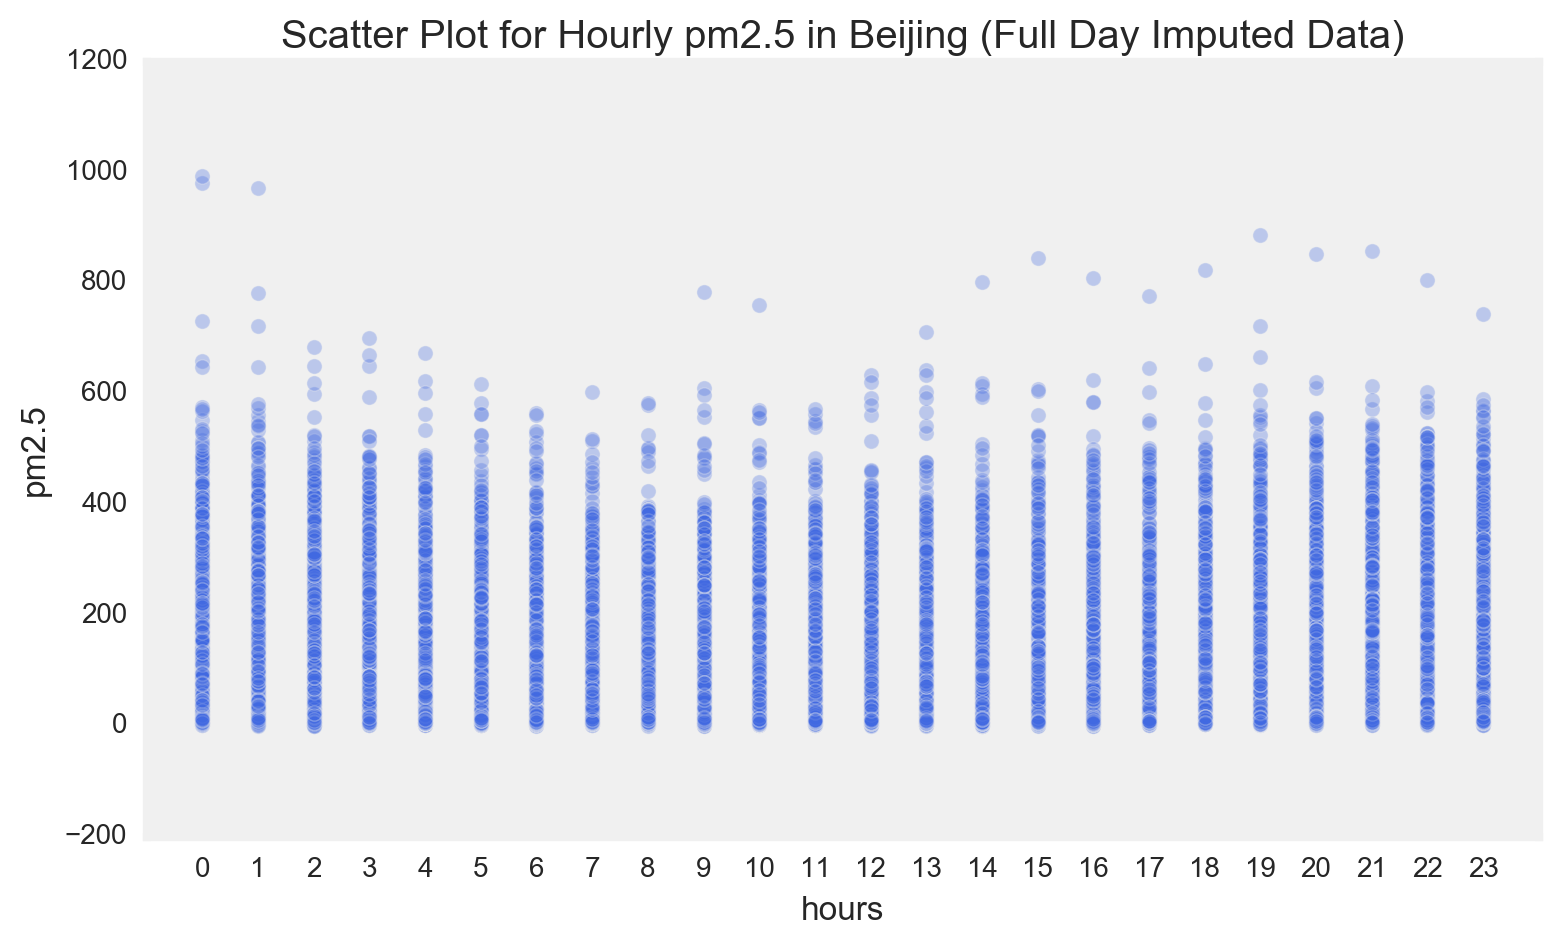

In [520]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pm25_imputed_final.Hour, pm25_imputed_final['Beijing_pm2.5'], alpha=0.3, s=30, c='royalblue')
ax.set(xticks=range(24), xlim=[-1, 24])

ax.set_title("Scatter Plot for Hourly pm2.5 in Beijing (Full Day Imputed Data)")
ax.set_xlabel("hours")
ax.set_ylabel("pm2.5")
ax.grid('off')


plt.show()

## Cleaning pm25_valid_final

In [505]:
pm25_valid_final=pm25[pm25.Value>=0]

In [506]:
pm25_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70018 entries, 0 to 8039
Data columns (total 12 columns):
Site          70018 non-null object
Parameter     70018 non-null object
Date (LST)    70018 non-null object
Year          70018 non-null int64
Month         70018 non-null int64
Day           70018 non-null int64
Hour          70018 non-null int64
Value         70018 non-null int64
Unit          70018 non-null object
Duration      70018 non-null object
QC Name       70018 non-null object
Date          70018 non-null object
dtypes: int64(5), object(7)
memory usage: 6.9+ MB


In [507]:
pm25_valid_final.head(2)

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
0,Beijing,PM2.5,4/8/08 15:00,2008,4,8,15,207,�g/mg_,1 Hr,Valid,4/8/08
1,Beijing,PM2.5,4/8/08 16:00,2008,4,8,16,180,�g/mg_,1 Hr,Valid,4/8/08


In [508]:
test = pm25_valid_final.groupby('Date').count().reset_index()#.sort('Site', ascending=False)
test[test.Site == 24].shape

(2646, 12)

In [509]:
len(test.Date.unique())

3003

In [510]:
len(pm25.Date.unique()) # We have 101 days with 24 negative values. Check!

3104

In [511]:
# Change date from object to datetime, drop unnecessary columns, rename Value column, rearange columns
pm25_valid_final['Date'] = pd.to_datetime(pm25_valid_final.Date)
pm25_valid_final.drop(['Site','Parameter','Date (LST)','Year','Month','Day','Duration', 'QC Name','Unit'],
                      axis=1, inplace=True)
pm25_valid_final.rename(columns={'Value': 'Beijing_pm2.5'}, inplace=True)
col = ['Date', 'Hour', 'Beijing_pm2.5']
pm25_valid_final = pm25_valid_final[col]

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# pm25_valid_final
- Drops all the negative data. Maximum original data perserved, with 2646 full days and 3003 totaly days

In [524]:
pm25_valid_final.to_csv("pm2.5_Valid_Final")

In [513]:
pm25_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70018 entries, 0 to 8039
Data columns (total 3 columns):
Date             70018 non-null datetime64[ns]
Hour             70018 non-null int64
Beijing_pm2.5    70018 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 MB


In [512]:
pm25_valid_final.head(2)

,Date,Hour,Beijing_pm2.5
0,2008-04-08,15,207
1,2008-04-08,16,180


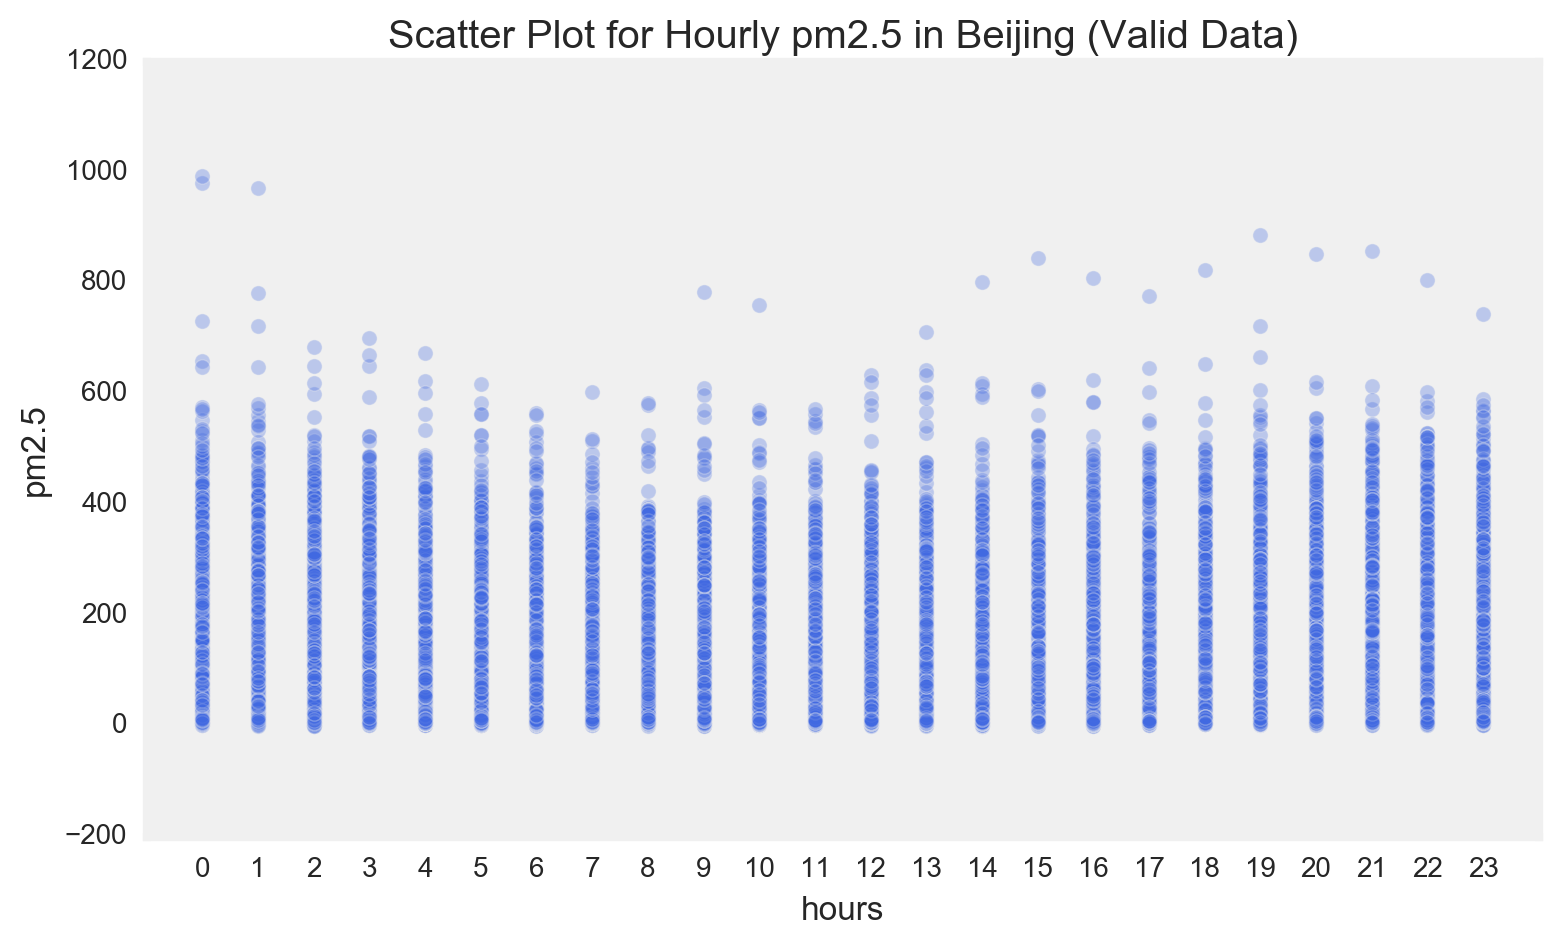

In [519]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pm25_valid_final.Hour, pm25_valid_final['Beijing_pm2.5'], alpha=0.3, s=30, c='royalblue')
ax.set(xticks=range(24), xlim=[-1, 24])

ax.set_title("Scatter Plot for Hourly pm2.5 in Beijing (Valid Data)" )
ax.set_xlabel("hours")
ax.set_ylabel("pm2.5")
ax.grid('off')
plt.show()

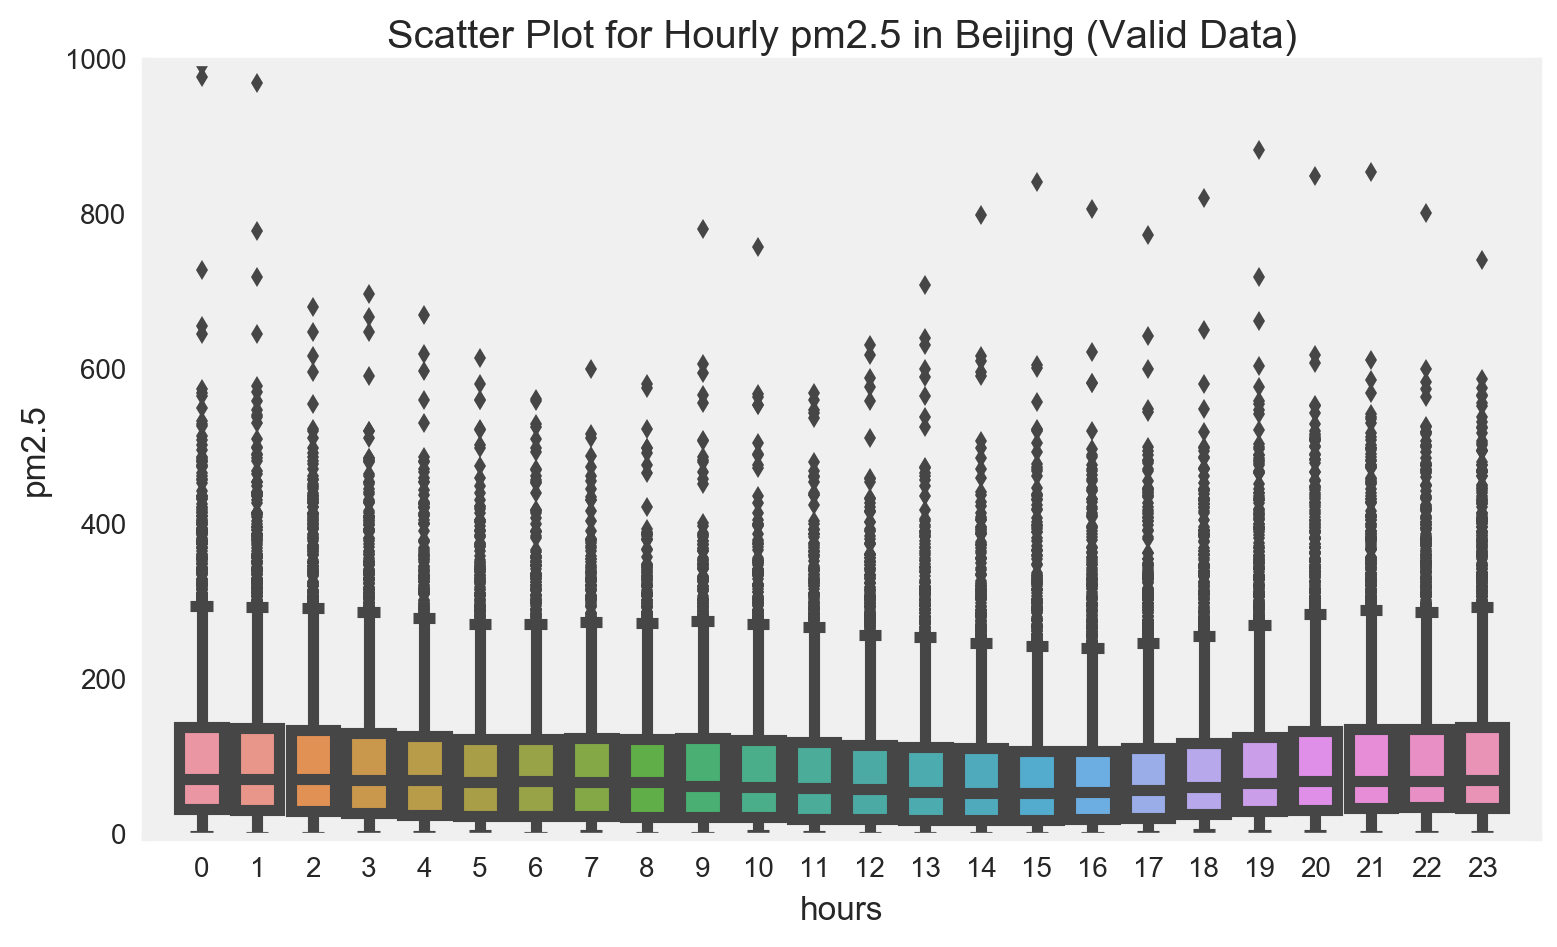

In [523]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x= pm25_valid_final.Hour, y= pm25_valid_final['Beijing_pm2.5'])
ax.set(xticks=range(24), xlim=[-1, 24])

ax.set_title("Scatter Plot for Hourly pm2.5 in Beijing (Valid Data)" )
ax.set_xlabel("hours")
ax.set_ylabel("pm2.5")
ax.grid('off')
plt.show()

# Importing weather data

In [168]:
# Valid data till end of Oct 21, 2016. Starting Oct 22, 2016, windchill column added on the website. Rescrape.
weather0 = pd.read_csv('../../../../../scrapy_projects/weather/weather/weather.csv')
weather0 = weather0.iloc[:170831, :]

In [169]:
# Rescrape data from 10/22/2016, drop windchill
weather1 = pd.read_csv('../../../../../scrapy_projects/weather1/weather1.csv')
weather1 = weather1.iloc[113:, :]
weather1.drop(['windchill'], axis=1, inplace=True)

In [171]:
weather0.tail(2)

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
170829,\n6.7 mph\n,\n51.8 °F\n,\n50.0 °F\n,\n -\n,\n -\n,94%,\n30.09 in\n,NaN,11:00 PM,"Friday, October 21, 2016",Clear,\n\t \n,North
170830,\n6.7 mph\n,\n51.8 °F\n,\n50.0 °F\n,\n -\n,\n -\n,94%,\n30.09 in\n,NaN,11:30 PM,"Friday, October 21, 2016",Clear,\n\t \n,North


In [172]:
weather1.head(2)

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
113,\n4.5 mph\n,\n51.8 °F\n,\n50.0 °F\n,\n -\n,\n -\n,94%,\n30.09 in\n,NaN,12:00 AM,"Saturday, October 22, 2016",Clear,\n\t \n,North
114,\n4.5 mph\n,\n53.6 °F\n,\n50.0 °F\n,\n -\n,\n -\n,88%,\n30.09 in\n,NaN,12:30 AM,"Saturday, October 22, 2016",Clear,\n\t \n,NNE


In [173]:
weather0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170831 entries, 0 to 170830
Data columns (total 13 columns):
wind_speed    170831 non-null object
temp          170831 non-null object
dew_point     170831 non-null object
gust_speed    170831 non-null object
visibility    170831 non-null object
humidity      170831 non-null object
pressure      170831 non-null object
precip        136851 non-null object
time          170831 non-null object
date          170831 non-null object
conditions    170006 non-null object
events        57202 non-null object
wind_dir      170831 non-null object
dtypes: object(13)
memory usage: 16.9+ MB


In [174]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 113 to 5901
Data columns (total 13 columns):
wind_speed    5789 non-null object
temp          5789 non-null object
dew_point     5789 non-null object
gust_speed    5789 non-null object
visibility    5789 non-null object
humidity      5789 non-null object
pressure      5789 non-null object
precip        825 non-null object
time          5789 non-null object
date          5789 non-null object
conditions    5596 non-null object
events        5789 non-null object
wind_dir      5789 non-null object
dtypes: object(13)
memory usage: 588.0+ KB


In [182]:
weather=pd.concat([weather0, weather1], axis=0).reset_index()
weather.drop(['index'], axis=1, inplace=True)

In [184]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176620 entries, 0 to 176619
Data columns (total 13 columns):
wind_speed    176620 non-null object
temp          176620 non-null object
dew_point     176620 non-null object
gust_speed    176620 non-null object
visibility    176620 non-null object
humidity      176620 non-null object
pressure      176620 non-null object
precip        137676 non-null object
time          176620 non-null object
date          176620 non-null object
conditions    175602 non-null object
events        62991 non-null object
wind_dir      176620 non-null object
dtypes: object(13)
memory usage: 17.5+ MB


In [185]:
weather.head(2)

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
0,\n4.5 mph\n,\n51.8 °F\n,\n50.0 °F\n,\n -\n,\n3.7 mi\n,94%,\n29.89 in\n,NaN,12:00 AM,"Wednesday, April 9, 2008",Light Rain,\nRain\n,North
1,\n2.2 mph\n,\n51.8 °F\n,\n50.0 °F\n,\n -\n,\n3.1 mi\n,94%,\n29.86 in\n,NaN,1:00 AM,"Wednesday, April 9, 2008",Light Rain,\nRain\n,Variable


In [186]:
weather = weather.apply(lambda x: x.str.replace('\n', '').replace('  -', np.nan))

In [187]:
weather.head(2)

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
0,4.5 mph,51.8 °F,50.0 °F,NaN,3.7 mi,94%,29.89 in,NaN,12:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,North
1,2.2 mph,51.8 °F,50.0 °F,NaN,3.1 mi,94%,29.86 in,NaN,1:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,Variable


In [189]:
unique_values = {}
for col in weather.columns:
    unique_values[col] = weather[col].unique()
unique_values

{'conditions': array(['Light Rain', 'Mist', 'Unknown', 'Clear', 'Scattered Clouds',
        '\t\xc2\xa0', 'Rain', 'Overcast', 'Haze', nan, 'Mostly Cloudy',
        'Partly Cloudy', 'Thunderstorm', 'Thunderstorms and Rain',
        'Light Thunderstorms and Rain', 'Light Rain Showers',
        'Light Thunderstorm', 'Fog', 'Partial Fog', 'Widespread Dust',
        'Blowing Sand', 'Rain\t,Thunderstorm', 'Rain Showers', 'Snow',
        'Smoke', 'Heavy Rain Showers', 'Rain\t,Snow', 'Snow\t,Thunderstorm',
        'Fog\t,Rain', 'Squalls', 'Light Fog', 'Snow\t,Hail', 'Heavy Fog',
        'Fog\t,Snow', 'Light Drizzle', 'Heavy Rain',
        'Heavy Thunderstorms and Rain', 'Light Snow', 'Light Freezing Fog'], dtype=object),
 'date': array(['Wednesday, April 9, 2008', 'Thursday, April 10, 2008',
        'Friday, April 11, 2008', ..., 'Tuesday, January 31, 2017',
        'Wednesday, February 1, 2017', 'Thursday, February 2, 2017'], dtype=object),
 'dew_point': array(['50.0\xc2\xa0\xc2\xb0F', '51\xc

In [8]:
weather.isnull().sum()

wind_speed         0
temp               8
dew_point      79955
gust_speed     38274
visibility     17583
humidity           9
pressure           0
precip        171816
time               0
date               0
conditions       825
events        136000
wind_dir       66456
dtype: int64

In [9]:
new_to_old = {'wind_speed':'wind_dir',
 'temp':'temp',
 'dew_point':'wind_chill',
 'gust_speed':'wind_speed',
 'visibility':'pressure',
 'humidity':'dew_point',
 'pressure':'humidity',
 'precip':'gust_speed',
 'time':'time',
 'date':'date',
 'conditions':'events',
 'events':'precip',
 'wind_dir':'visibility'}


In [10]:
new_rows = weather.pressure.map(lambda x: True if '%' in x else False)

In [12]:
np.sum(new_rows)

136000

In [13]:
old_w = weather.loc[~new_rows, :]
new_w = weather.loc[new_rows, :]

In [14]:
new_w.rename(columns=new_to_old, inplace=True)

/Users/wg/anaconda2/envs/dsi/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [15]:
new_w.head(2)

,wind_dir,temp,wind_chill,wind_speed,pressure,dew_point,humidity,gust_speed,time,date,events,precip,visibility
31,South,60.8 °F,NaN,8.9 mph,29.95 in,48.2 °F,63%,NaN,12:00 AM,"Thursday, April 10, 2008",\t,NaN,3.7 mi
32,ESE,59.0 °F,NaN,4.5 mph,29.98 in,48.2 °F,67%,NaN,1:00 AM,"Thursday, April 10, 2008",\t,NaN,3.7 mi


In [42]:
weather_fixed = pd.concat([old_w, new_w], axis=0)

In [43]:
weather_fixed.shape

(175456, 14)

In [106]:
weather_fixed.tail(2)

,conditions,date,dew_point,events,gust_speed,humidity,precip,pressure,temp,time,visibility,wind_chill,wind_dir,wind_speed
175454,NaN,"Thursday, January 12, 2017",8.6,\t,0.0,25.0,NaN,30.06,42.8,3:30 PM,0.0,37.6 °F,SW,8.9
175455,NaN,"Thursday, January 12, 2017",8.6,\t,0.0,26.0,NaN,30.04,41.0,4:00 PM,5.0,34.4 °F,SW,11.2


In [44]:
weather_fixed.head()

,conditions,date,dew_point,events,gust_speed,humidity,precip,pressure,temp,time,visibility,wind_chill,wind_dir,wind_speed
0,Light Rain,"Wednesday, April 9, 2008",50.0 °F,Rain,NaN,94%,NaN,29.89 in,51.8 °F,12:00 AM,3.7 mi,NaN,North,4.5 mph
1,Light Rain,"Wednesday, April 9, 2008",50.0 °F,Rain,NaN,94%,NaN,29.86 in,51.8 °F,1:00 AM,3.1 mi,NaN,Variable,2.2 mph
2,Light Rain,"Wednesday, April 9, 2008",51 °F,Rain,NaN,89%,NaN,29.86 in,53 °F,2:00 AM,6 mi,NaN,NE,4.5 mph
3,Mist,"Wednesday, April 9, 2008",51.8 °F,\t,NaN,100%,NaN,29.86 in,51.8 °F,2:00 AM,3.1 mi,NaN,Variable,2.2 mph
4,Mist,"Wednesday, April 9, 2008",50.0 °F,\t,NaN,94%,NaN,29.86 in,51.8 °F,3:00 AM,2.5 mi,NaN,NNW,8.9 mph


In [45]:
weather_fixed.dew_point[0]

'50.0\xc2\xa0\xc2\xb0F'

In [46]:
def float_fixer(x, indicator='.', adj=2):
    try:
        x_ = x.strip()
        ind = x_.find(indicator)
        if ind == -1:
            try:
                x_ = float(x_[:2])
                return x_
            except:
                return 0.
        else:
            x_ = float(x_[:ind+adj])
            return x_
    except:
        return 0.

In [47]:
weather_fixed['gust_speed'] = weather_fixed.gust_speed.apply(float_fixer)
weather_fixed['wind_speed'] = weather_fixed.wind_speed.apply(float_fixer)
weather_fixed['dew_point'] = weather_fixed.dew_point.apply(float_fixer)
weather_fixed['pressure'] = weather_fixed.pressure.apply(float_fixer, adj=3)
weather_fixed['visibility'] = weather_fixed.visibility.apply(float_fixer)
weather_fixed['temp'] = weather_fixed.temp.apply(float_fixer)
weather_fixed['humidity'] = weather_fixed.humidity.apply(float_fixer, indicator='%', adj=0)

In [48]:
weather_fixed.head(20)

,conditions,date,dew_point,events,gust_speed,humidity,precip,pressure,temp,time,visibility,wind_chill,wind_dir,wind_speed
0,Light Rain,"Wednesday, April 9, 2008",50.0,Rain,0.0,94.0,NaN,29.89,51.8,12:00 AM,3.7,NaN,North,4.5
1,Light Rain,"Wednesday, April 9, 2008",50.0,Rain,0.0,94.0,NaN,29.86,51.8,1:00 AM,3.1,NaN,Variable,2.2
2,Light Rain,"Wednesday, April 9, 2008",51.0,Rain,0.0,89.0,NaN,29.86,53.0,2:00 AM,0.0,NaN,NE,4.5
3,Mist,"Wednesday, April 9, 2008",51.8,\t,0.0,100.0,NaN,29.86,51.8,2:00 AM,3.1,NaN,Variable,2.2
4,Mist,"Wednesday, April 9, 2008",50.0,\t,0.0,94.0,NaN,29.86,51.8,3:00 AM,2.5,NaN,NNW,8.9
5,Mist,"Wednesday, April 9, 2008",50.0,\t,0.0,94.0,NaN,29.86,51.8,4:00 AM,2.5,NaN,North,2.2
6,Mist,"Wednesday, April 9, 2008",51.0,\t,0.0,88.0,NaN,29.85,53.0,5:00 AM,0.0,NaN,NNE,2.2
7,Mist,"Wednesday, April 9, 2008",50.0,\t,0.0,94.0,NaN,29.86,51.8,5:00 AM,2.5,NaN,NNW,4.5
8,Mist,"Wednesday, April 9, 2008",50.0,\t,0.0,94.0,NaN,29.86,51.8,6:00 AM,2.2,NaN,North,6.7
9,Mist,"Wednesday, April 9, 2008",50.0,\t,0.0,94.0,NaN,29.86,51.8,7:00 AM,2.2,NaN,Variable,2.2


conditions    136825
date               0
dew_point         12
events             0
gust_speed    170634
humidity           0
precip        175456
pressure           0
temp               8
time               0
visibility     84039
wind_chill    119408
wind_dir           0
wind_speed         0
dtype: int64

In [30]:
weather.loc[unmatched, :].head()

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
464,Calm,48.2 °F,NaN,Calm,29.98 in,39.2 °F,71%,NaN,12:00 AM,"Thursday, April 24, 2008",\t,NaN,NaN
528,Calm,46.4 °F,NaN,Calm,29.95 in,30.2 °F,53%,NaN,4:00 AM,"Saturday, April 26, 2008",\t,NaN,NaN
674,Calm,68.0 °F,NaN,Calm,29.59 in,55.4 °F,64%,NaN,9:00 PM,"Wednesday, April 30, 2008",\t,NaN,4.3 mi
777,Calm,47 °F,NaN,Calm,29.79 in,46 °F,96%,NaN,5:00 AM,"Sunday, May 4, 2008",\t,NaN,12 mi
801,Calm,51.8 °F,NaN,Calm,29.83 in,48.2 °F,88%,NaN,1:00 AM,"Monday, May 5, 2008",\t,NaN,NaN


In [ ]:
ew_rows = weather.wind_dir.map(lambda x: True if )

In [594]:
weather['wind_speed'].apply(lambda x: x.replace('mph',''))

0             4.5 
1             2.2 
2             4.5 
3             2.2 
4             8.9 
5             2.2 
6             2.2 
7             4.5 
8             6.7 
9             2.2 
10            4.5 
11            6.7 
12            6.7 
13            6.7 
14            6.7 
15            6.7 
16            6.7 
17            8.9 
18            6.7 
19            4.5 
20            6.7 
21            6.7 
22            6.7 
23            6.7 
24           11.2 
25            4.5 
26            6.7 
27            4.5 
28            4.5 
29            4.5 
            ...   
175426       North
175427        Calm
175428         NNW
175429         NNE
175430       North
175431       North
175432       North
175433       North
175434    Variable
175435         ENE
175436         NNE
175437         ENE
175438    Variable
175439    Variable
175440       North
175441         NNW
175442       North
175443       South
175444          NW
175445         WNW
175446         WNW
175447      

In [ ]:
def clean(df):
    df['wind_speed'] = df['wind_speed']

In [589]:
weather.columns

Index([u'wind_speed', u'temp', u'dew_point', u'gust_speed', u'visibility',
       u'humidity', u'pressure', u'precip', u'time', u'date', u'conditions',
       u'events', u'wind_dir'],
      dtype='object')

In [591]:
unique_values = {}
for col in weather.columns:
    unique_values[col] = weather[col].unique()
unique_values

{'conditions': array(['Light Rain', 'Mist', 'Unknown', 'Clear', 'Scattered Clouds',
        '\t\xc2\xa0', 'Rain', 'Overcast', 'Haze', nan, 'Mostly Cloudy',
        'Partly Cloudy', 'Thunderstorm', 'Thunderstorms and Rain',
        'Light Thunderstorms and Rain', 'Light Rain Showers',
        'Light Thunderstorm', 'Fog', 'Partial Fog', 'Widespread Dust',
        'Blowing Sand', 'Rain\t,Thunderstorm', 'Rain Showers', 'Snow',
        'Smoke', 'Heavy Rain Showers', 'Rain\t,Snow', 'Snow\t,Thunderstorm',
        'Fog\t,Rain', 'Squalls', 'Light Fog', 'Snow\t,Hail', 'Heavy Fog',
        'Fog\t,Snow', 'Light Drizzle', 'Heavy Rain',
        'Heavy Thunderstorms and Rain'], dtype=object),
 'date': array(['Wednesday, April 9, 2008', 'Thursday, April 10, 2008',
        'Friday, April 11, 2008', ..., 'Tuesday, January 10, 2017',
        'Wednesday, January 11, 2017', 'Thursday, January 12, 2017'], dtype=object),
 'dew_point': array(['50.0\xc2\xa0\xc2\xb0F', '51\xc2\xa0\xc2\xb0F',
        '51.8\xc2\x

In [580]:
weather.events.unique()

array(['Rain', '\xc2\xa0', 'nan', 'Rain,Thunderstorm', 'Thunderstorm',
       'Fog', 'Fog,Rain'], dtype=object)

In [572]:
weather.head(100)

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
0,4.5 mph,51.8 °F,50.0 °F,NaN,3.7 mi,94%,29.89 in,NaN,12:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,North
1,2.2 mph,51.8 °F,50.0 °F,NaN,3.1 mi,94%,29.86 in,NaN,1:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,Variable
2,4.5 mph,53 °F,51 °F,NaN,6 mi,89%,29.86 in,NaN,2:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,NE
3,2.2 mph,51.8 °F,51.8 °F,NaN,3.1 mi,100%,29.86 in,NaN,2:00 AM,"Wednesday, April 9, 2008",Mist,NaN,Variable
4,8.9 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,3:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNW
5,2.2 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,4:00 AM,"Wednesday, April 9, 2008",Mist,NaN,North
6,2.2 mph,53 °F,51 °F,NaN,5 mi,88%,29.85 in,NaN,5:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNE
7,4.5 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,5:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNW
8,6.7 mph,51.8 °F,50.0 °F,NaN,2.2 mi,94%,29.86 in,NaN,6:00 AM,"Wednesday, April 9, 2008",Mist,NaN,North
9,2.2 mph,51.8 °F,50.0 °F,NaN,2.2 mi,94%,29.86 in,NaN,7:00 AM,"Wednesday, April 9, 2008",Mist,NaN,Variable


In [539]:
weather[weather.gust_speed == '  -'].shape

(38274, 13)

In [573]:
weather.isnull().sum()

wind_speed         0
temp               8
dew_point      79955
gust_speed     38274
visibility     17583
humidity           9
pressure           0
precip        171816
time               0
date               0
conditions       825
events             0
wind_dir       66456
dtype: int64

In [561]:
weather[weather.precip.isnull()]

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
0,4.5 mph,51.8 °F,50.0 °F,NaN,3.7 mi,94%,29.89 in,NaN,12:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,North
1,2.2 mph,51.8 °F,50.0 °F,NaN,3.1 mi,94%,29.86 in,NaN,1:00 AM,"Wednesday, April 9, 2008",Light Rain,Rain,Variable
3,2.2 mph,51.8 °F,51.8 °F,NaN,3.1 mi,100%,29.86 in,NaN,2:00 AM,"Wednesday, April 9, 2008",Mist,NaN,Variable
4,8.9 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,3:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNW
5,2.2 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,4:00 AM,"Wednesday, April 9, 2008",Mist,NaN,North
7,4.5 mph,51.8 °F,50.0 °F,NaN,2.5 mi,94%,29.86 in,NaN,5:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNW
8,6.7 mph,51.8 °F,50.0 °F,NaN,2.2 mi,94%,29.86 in,NaN,6:00 AM,"Wednesday, April 9, 2008",Mist,NaN,North
9,2.2 mph,51.8 °F,50.0 °F,NaN,2.2 mi,94%,29.86 in,NaN,7:00 AM,"Wednesday, April 9, 2008",Mist,NaN,Variable
11,6.7 mph,55.4 °F,50.0 °F,NaN,2.5 mi,82%,29.89 in,NaN,8:00 AM,"Wednesday, April 9, 2008",Mist,NaN,NNW
12,6.7 mph,57.2 °F,50.0 °F,NaN,4.3 mi,77%,29.89 in,NaN,9:00 AM,"Wednesday, April 9, 2008",Unknown,NaN,North


In [562]:
weather[weather.conditions.isnull()]

,wind_speed,temp,dew_point,gust_speed,visibility,humidity,pressure,precip,time,date,conditions,events,wind_dir
121,4.5 mph,50 °F,42 °F,NaN,16 mi,65%,30.02 in,NaN,11:00 PM,"Saturday, April 12, 2008",NaN,NaN,SW
154,4.5 mph,58 °F,45 °F,NaN,11 mi,51%,29.85 in,NaN,2:00 AM,"Monday, April 14, 2008",NaN,NaN,SW
158,2.2 mph,53 °F,47 °F,NaN,7 mi,74%,29.85 in,NaN,5:00 AM,"Monday, April 14, 2008",NaN,NaN,SSE
182,8.9 mph,66 °F,52 °F,NaN,12 mi,50%,29.85 in,NaN,11:00 PM,"Monday, April 14, 2008",NaN,NaN,SW
186,4.5 mph,59 °F,52 °F,NaN,9 mi,69%,29.84 in,NaN,2:00 AM,"Tuesday, April 15, 2008",NaN,NaN,SW
263,13.4 mph,82 °F,38 °F,NaN,6 mi,12%,29.88 in,NaN,2:00 PM,"Thursday, April 17, 2008",NaN,NaN,SW
518,8.9 mph,61 °F,23 °F,NaN,16 mi,13%,29.86 in,NaN,8:00 PM,"Friday, April 25, 2008",NaN,NaN,NNW
680,4.5 mph,65 °F,56 °F,NaN,7 mi,64%,29.63 in,NaN,2:00 AM,"Thursday, May 1, 2008",NaN,NaN,East
1230,4.5 mph,73 °F,28 °F,NaN,19 mi,10%,29.74 in,NaN,8:00 PM,"Sunday, May 18, 2008",NaN,NaN,NW
1293,13.4 mph,78 °F,12 °F,NaN,6 mi,4%,29.55 in,NaN,8:00 PM,"Tuesday, May 20, 2008",NaN,NaN,NNW


## Sidetrack - Debugging....Changing data manually in the original dataset
## For 6 dates, double entries for hour 3, when one of them should have been 2

In [53]:
pm25_full_day_wide.isnull().any()

Hour
Date    False
0       False
1       False
2        True
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
dtype: bool

In [68]:
pm25_full_day_wide[pm25_full_day_wide[2].isnull()==True]

Hour,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
1079,3/13/11,377.0,400.0,NaN,359.5,339.0,320.0,339.0,332.0,318.0,...,25.0,24.0,20.0,16.0,16.0,17.0,13.0,11.0,9.0,8.0
1084,3/13/16,38.0,15.0,NaN,10.0,14.0,9.0,8.0,14.0,12.0,...,18.0,12.0,16.0,13.0,11.0,21.0,27.0,30.0,48.0,57.0
1086,3/14/10,44.0,65.0,NaN,71.5,80.0,80.0,105.0,86.0,93.0,...,83.0,86.0,94.0,112.0,108.0,116.0,105.0,112.0,87.0,103.0
1247,3/8/09,204.0,189.0,NaN,187.0,188.0,191.0,211.0,211.0,181.0,...,101.0,72.0,58.0,78.0,73.0,77.0,71.0,86.0,41.0,14.0
1252,3/8/15,201.0,217.0,NaN,222.5,223.0,203.0,214.0,238.0,256.0,...,11.0,12.0,9.0,10.0,7.0,8.0,14.0,9.0,17.0,10.0
1259,3/9/14,131.0,154.0,NaN,83.5,172.0,143.0,122.0,114.0,100.0,...,147.0,133.0,126.0,124.0,122.0,91.0,98.0,91.0,78.0,55.0


In [66]:
pm25[pm25.Date=="3/9/14"]

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
1608,Beijing,PM2.5,3/9/14 0:00,2014,3,9,0,131,�g/m_,1 Hr,Valid,3/9/14
1609,Beijing,PM2.5,3/9/14 1:00,2014,3,9,1,154,�g/m_,1 Hr,Valid,3/9/14
1610,Beijing,PM2.5,3/9/14 3:00,2014,3,9,3,112,�g/m_,1 Hr,Valid,3/9/14
1611,Beijing,PM2.5,3/9/14 3:00,2014,3,9,3,55,�g/m_,1 Hr,Valid,3/9/14
1612,Beijing,PM2.5,3/9/14 4:00,2014,3,9,4,172,�g/m_,1 Hr,Valid,3/9/14
1613,Beijing,PM2.5,3/9/14 5:00,2014,3,9,5,143,�g/m_,1 Hr,Valid,3/9/14
1614,Beijing,PM2.5,3/9/14 6:00,2014,3,9,6,122,�g/m_,1 Hr,Valid,3/9/14
1615,Beijing,PM2.5,3/9/14 7:00,2014,3,9,7,114,�g/m_,1 Hr,Valid,3/9/14
1616,Beijing,PM2.5,3/9/14 8:00,2014,3,9,8,100,�g/m_,1 Hr,Valid,3/9/14
1617,Beijing,PM2.5,3/9/14 9:00,2014,3,9,9,119,�g/m_,1 Hr,Valid,3/9/14


In [62]:
pm25[pm25.Date=="3/13/16"]

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name,Date
1728,Beijing,PM2.5,3/13/16 0:00,2016,3,13,0,38,�g/m_,1 Hr,Valid,3/13/16
1729,Beijing,PM2.5,3/13/16 1:00,2016,3,13,1,15,�g/m_,1 Hr,Valid,3/13/16
1730,Beijing,PM2.5,3/13/16 3:00,2016,3,13,3,11,�g/m_,1 Hr,Valid,3/13/16
1731,Beijing,PM2.5,3/13/16 3:00,2016,3,13,3,9,�g/m_,1 Hr,Valid,3/13/16
1732,Beijing,PM2.5,3/13/16 4:00,2016,3,13,4,14,�g/m_,1 Hr,Valid,3/13/16
1733,Beijing,PM2.5,3/13/16 5:00,2016,3,13,5,9,�g/m_,1 Hr,Valid,3/13/16
1734,Beijing,PM2.5,3/13/16 6:00,2016,3,13,6,8,�g/m_,1 Hr,Valid,3/13/16
1735,Beijing,PM2.5,3/13/16 7:00,2016,3,13,7,14,�g/m_,1 Hr,Valid,3/13/16
1736,Beijing,PM2.5,3/13/16 8:00,2016,3,13,8,12,�g/m_,1 Hr,Valid,3/13/16
1737,Beijing,PM2.5,3/13/16 9:00,2016,3,13,9,11,�g/m_,1 Hr,Valid,3/13/16
